## Project overview
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
There are four datasets:
* <strong>bank-additional-full.csv</strong>  with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
* <strong>bank-additional.csv</strong>  with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
* <strong>bank-full.csv</strong>  with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
* <strong>bank.csv</strong>  with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

* link dataset : <a href="https://archive.ics.uci.edu/ml/datasets/Bank+Marketing"> disini</a>

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


## Import Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from sklearn import metrics
import statsmodels.api as sm

%matplotlib inline

## Load Dataset

In [93]:
df = pd.read_csv("./Dataset/bank-additional/bank-additional-full.csv", sep=';')
df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [94]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [96]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no missing values

In [97]:
df.rename(columns={"default":"credit", "y":"subscribed"}, inplace=True)

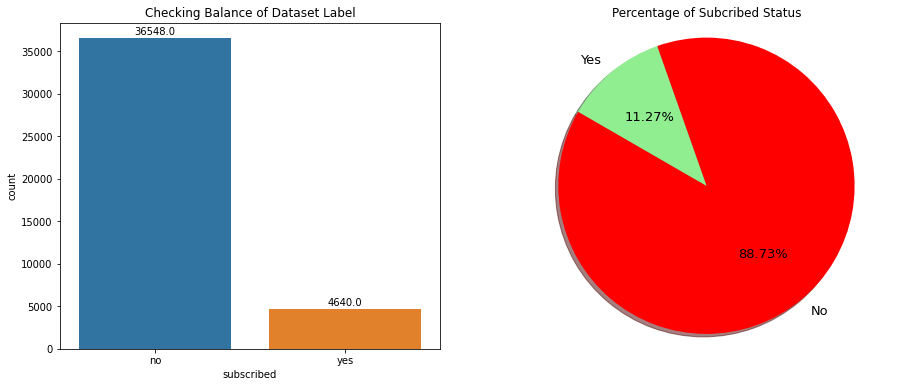

In [98]:
# mengecek keseimbangan jumlah label/output dataset
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(121)
plt.title("Checking Balance of Dataset Label")
ax = sns.countplot(x='subscribed', data=df)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,7), textcoords='offset points')
    
plt.subplot(122)
plt.title("Percentage of Subcribed Status")
subscribed_values_count = df['subscribed'].value_counts()
subscribed_size = subscribed_values_count.values.tolist()
subscribed_labels = 'No', 'Yes'
colors=['red', 'lightgreen']
pcs, texts, autotexts = plt.pie(subscribed_size, labels=subscribed_labels, colors=colors,
                             autopct='%2.2f%%', shadow=True, startangle=150)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(13)
    autotext.set_fontsize(13)

plt.axis('equal')
plt.show()
    




Dari visualisasi data diatas dapat kita lihat bahwa jumlah label dataset yang digunakan adalah imbalanced, hal ini secara implisit akan mempengaruhi kinerja model yang akan dihasilkan. oleh karena itu harus dilakukan proses balancing data.

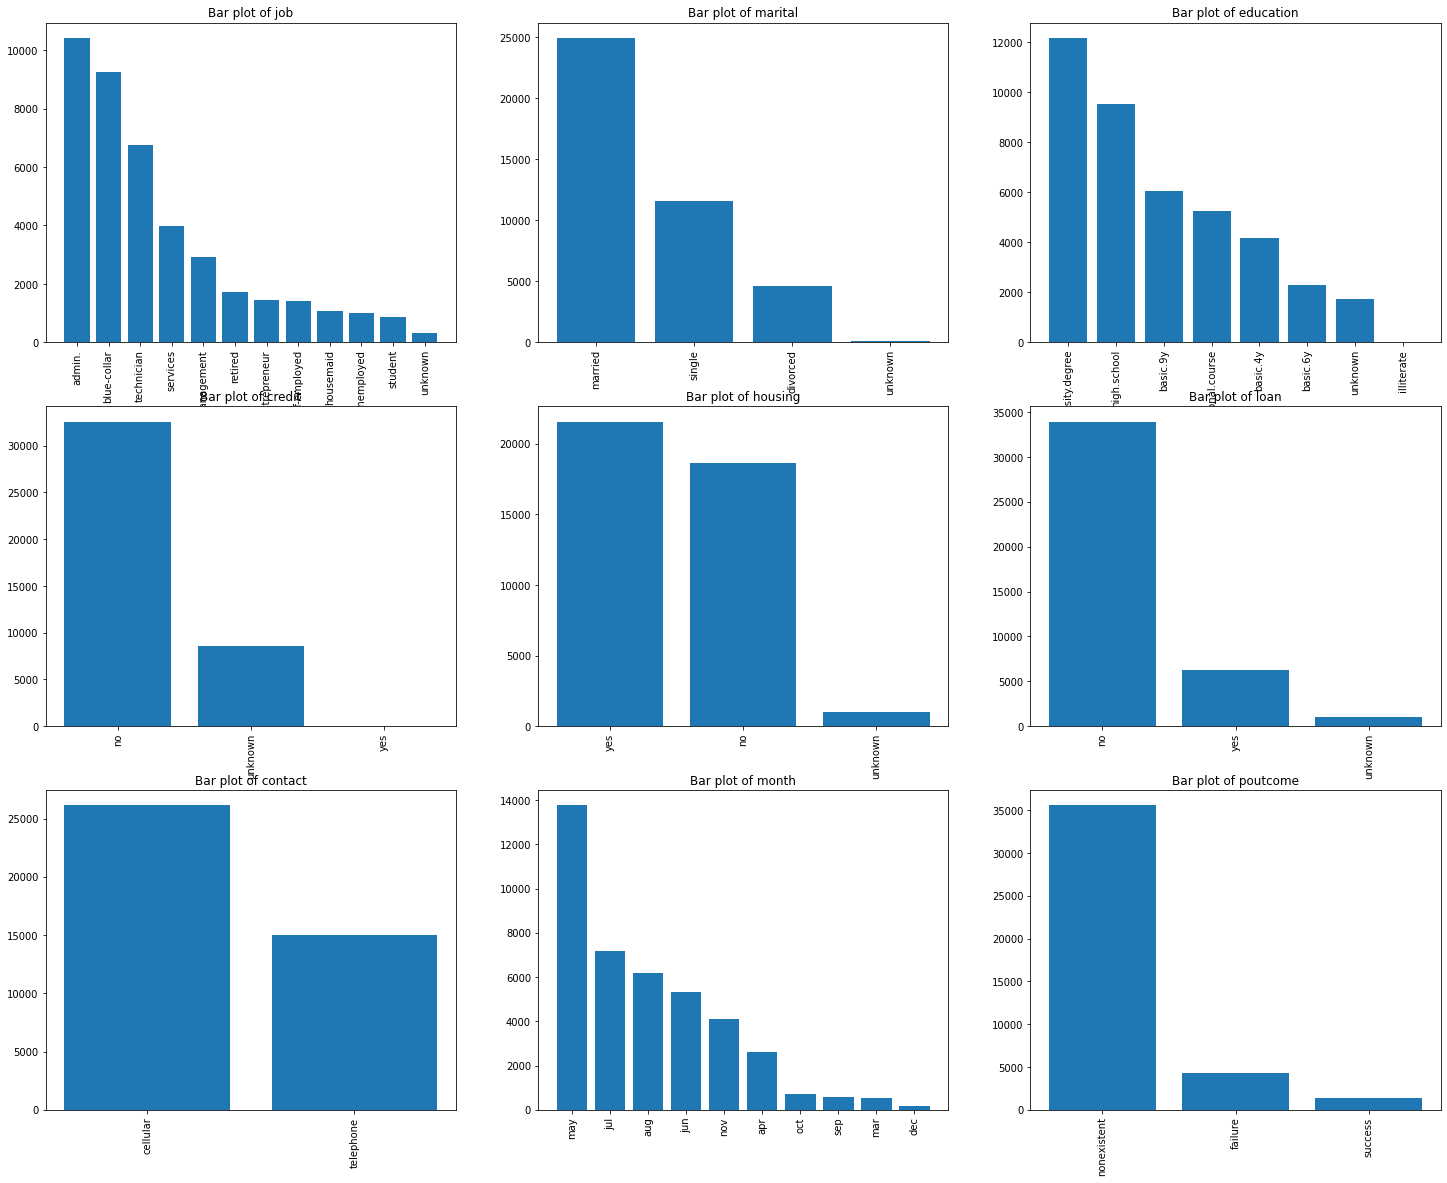

In [99]:
# Categorical columns exploration

categorical_cols = ['job','marital','education','credit','housing',
                   'loan','contact','month','poutcome']
fig, ax = plt.subplots(3,3, sharex=False, sharey=False, figsize=(25,20))
count = 0
for cat_col in categorical_cols:
    value_count = df[cat_col].value_counts()
    ax_x = count//3
    ax_y = count%3
    x_range = np.arange(0, len(value_count))
    ax[ax_x, ax_y].bar(x_range, value_count.values, tick_label=value_count.index)
    ax[ax_x, ax_y].set_title(f"Bar plot of {cat_col}")
    
    for i in ax[ax_x, ax_y].get_xticklabels():
        i.set_rotation(90)
    
    count+=1
plt.show()
    

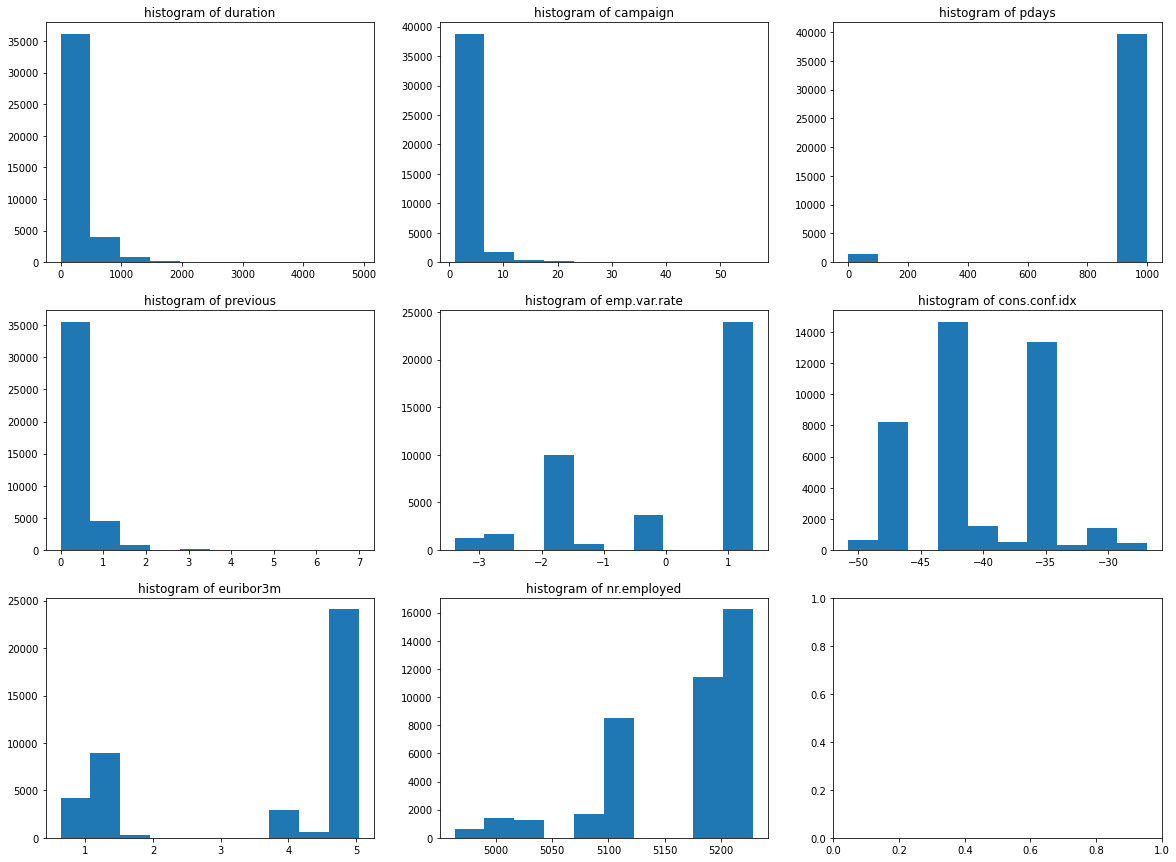

In [100]:
# Numerical columns exploration
num_cols = ['duration','campaign','pdays','previous','emp.var.rate',
            'cons.conf.idx','euribor3m','nr.employed']

fig, ax = plt.subplots(3,3, sharex=False, sharey=False, figsize=(20,15))
count = 0
for num_col in num_cols:
    ax_x = count//3
    ax_y = count%3
    
    ax[ax_x, ax_y].hist(df[num_col])
    ax[ax_x, ax_y].set_title(f"histogram of {num_col}")
    count+=1
plt.show()


In [101]:
df['subscribed'].replace({'yes':1, 'no':0}, inplace=True)

In [102]:
corr = df.corr()
print(corr['subscribed'].sort_values(axis=0, ascending=True))

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
age               0.030399
cons.conf.idx     0.054878
previous          0.230181
duration          0.405274
subscribed        1.000000
Name: subscribed, dtype: float64


In [103]:
# drop features yang memiliki korelasi lebih sedikit dan tidak relevan dengan proses klasifikasi
df.drop(columns=['nr.employed','pdays','euribor3m','emp.var.rate',
    'cons.price.idx','day_of_week','cons.conf.idx','contact','month'],axis=0, inplace=True)

In [104]:
df

,age,job,marital,education,credit,housing,loan,duration,campaign,previous,poutcome,subscribed
0,56,housemaid,married,basic.4y,no,no,no,261,1,0,nonexistent,0
1,57,services,married,high.school,unknown,no,no,149,1,0,nonexistent,0
2,37,services,married,high.school,no,yes,no,226,1,0,nonexistent,0
3,40,admin.,married,basic.6y,no,no,no,151,1,0,nonexistent,0
4,56,services,married,high.school,no,no,yes,307,1,0,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,334,1,0,nonexistent,1
41184,46,blue-collar,married,professional.course,no,no,no,383,1,0,nonexistent,0
41185,56,retired,married,university.degree,no,yes,no,189,2,0,nonexistent,0
41186,44,technician,married,professional.course,no,no,no,442,1,0,nonexistent,1


In [105]:
encoder = LabelEncoder()
col = ['marital','credit','housing','loan']

for i in col:
    df[i] = encoder.fit_transform(df[i])

In [106]:
# Encoding
cat_features = ['job','marital','education','credit','housing','loan','poutcome']
df = pd.get_dummies(df, columns=cat_features, drop_first=True)
df

,age,duration,campaign,previous,subscribed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_university.degree,education_unknown,credit_1,credit_2,housing_1,housing_2,loan_1,loan_2,poutcome_nonexistent,poutcome_success
0,56,261,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,57,149,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,37,226,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,40,151,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,56,307,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
41184,46,383,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41185,56,189,2,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
41186,44,442,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [107]:
#Assign variable features dan label
X = df.drop(columns='subscribed', axis=1).values
y = df['subscribed'].values

In [108]:
#splitting data scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=103)


In [109]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [110]:
# Logistik Regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
ypred = model_lr.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, ypred))
print(metrics.confusion_matrix(y_test, ypred))
print(metrics.classification_report(y_test, ypred))

Accuracy:  0.9076636724123979
[[10731   238]
 [  903   485]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10969
           1       0.67      0.35      0.46      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.66      0.70     12357
weighted avg       0.89      0.91      0.89     12357



In [111]:
# SUPPORT VECTOR MACHINES (SVM)
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
ypred2=svm_model.predict(X_test)
print("Acc: ", metrics.accuracy_score(y_test, ypred2))
print(metrics.confusion_matrix(y_test, ypred2))
print(metrics.classification_report(y_test, ypred2))


Acc:  0.902889050740471
[[10801   168]
 [ 1032   356]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10969
           1       0.68      0.26      0.37      1388

    accuracy                           0.90     12357
   macro avg       0.80      0.62      0.66     12357
weighted avg       0.89      0.90      0.88     12357



#### Akurasi setelah melakukan handling Imbalanced Dataset


In [112]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [113]:
X_train_smote, y_train_smote= smote.fit_resample(X_train.astype('float'),y_train)

In [114]:
from collections import Counter
print("Before oversampling: ",Counter(y_train))
print("After oversampling: ",Counter(y_train_smote))

Before oversampling:  Counter({0: 25579, 1: 3252})
After oversampling:  Counter({0: 25579, 1: 25579})


In [119]:
# Logistik Regression
from sklearn.linear_model import LogisticRegression
model_lr2 = LogisticRegression()
model_lr2.fit(X_train_smote, y_train_smote)
ypred_smote = model_lr2.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, ypred_smote))
print(metrics.confusion_matrix(y_test, ypred_smote))
print(metrics.classification_report(y_test, ypred_smote))

Accuracy:  0.8392004531844299
[[9294 1675]
 [ 312 1076]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     10969
           1       0.39      0.78      0.52      1388

    accuracy                           0.84     12357
   macro avg       0.68      0.81      0.71     12357
weighted avg       0.90      0.84      0.86     12357



In [116]:
# SUPPORT VECTOR MACHINES (SVM)
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train_smote, y_train_smote)
ypred2=svm_model.predict(X_test)
print("Acc: ", metrics.accuracy_score(y_test, ypred2))
print(metrics.confusion_matrix(y_test, ypred2))
print(metrics.classification_report(y_test, ypred2))

Acc:  0.8243910334223516
[[9104 1865]
 [ 305 1083]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     10969
           1       0.37      0.78      0.50      1388

    accuracy                           0.82     12357
   macro avg       0.67      0.81      0.70     12357
weighted avg       0.90      0.82      0.85     12357



In [117]:
# K-NEAREST NEIGHBOR ALGORITHM
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train_smote, y_train_smote)
pred_cv5= KNN.predict(X_test)
print("ACC: ", metrics.accuracy_score(y_test, pred_cv5))
matrix5 = metrics.confusion_matrix(y_test, pred_cv5)
print(matrix5)
print(metrics.classification_report(y_test, pred_cv5))

ACC:  0.8095816136602735
[[9117 1852]
 [ 501  887]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     10969
           1       0.32      0.64      0.43      1388

    accuracy                           0.81     12357
   macro avg       0.64      0.74      0.66     12357
weighted avg       0.88      0.81      0.83     12357



In [120]:
print("Accuracy menggunakan algoritma Logistik Regression pada imbalanced dataset : ",
      metrics.accuracy_score(y_test, ypred))
print(metrics.confusion_matrix(y_test, ypred))
recall1 = (10731)/(10731+238)
precision1= 10731/(10731+903)
print("precision : ", precision1)
print("recall: ",recall1)
print(metrics.classification_report(y_test, ypred))
print("Accuracy menggunakan algoritma Logistik Regression setelah melakukan balancing dataset: ",
     metrics.accuracy_score(y_test, ypred_smote))
print(metrics.confusion_matrix(y_test, ypred_smote))
recall2= 9282/(9282+1687)
precision2 = 9282/(9282+308)
print("precision: ",precision2)
print("recall: ", recall2)
print(metrics.classification_report(y_test, ypred_smote))

Accuracy menggunakan algoritma Logistik Regression pada imbalanced dataset :  0.9076636724123979
[[10731   238]
 [  903   485]]
precision :  0.9223826714801444
recall:  0.9783024888321634
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10969
           1       0.67      0.35      0.46      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.66      0.70     12357
weighted avg       0.89      0.91      0.89     12357

Accuracy menggunakan algoritma Logistik Regression setelah melakukan balancing dataset:  0.8392004531844299
[[9294 1675]
 [ 312 1076]]
precision:  0.9678832116788321
recall:  0.8462029355456286
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     10969
           1       0.39      0.78      0.52      1388

    accuracy                           0.84     12357
   macro avg       0.68      0.81      0.71     12357
weighted avg       

Untuk proses klasifikasi saya memilih menggunakan algoritma Logistic Regression karena performa yang dihasilkan lebih baik dari yang algoritma yang lain seperti SVM dan KNN serta waktu yang dibutuhkan untuk runtime lebih cepat. Hasil classification diatas dapat dilihat bahwa proses klasifikasi dengan dataset imbalanced menghasilkan accuracy sebesar 0.91. Serta hasil klasifikasi setelah dilakukan balancing dataset menggunakan metode oversampling SMOTE menghasilkan accuracy sebesar 0.84. walaupun memiliki tingkat accuracy, precision, dan recall yang tinggi penggunaan dataset imbalanced akan berisiko pada performa model ketika ingin melakukan proses klasifikasi dengan dataset baru. Maka dari itu perlu dilakukan proses balancing data agar performa model yang terbentuk lebih optimal.

In [121]:
# simpan model kedalam file denga pickle
import pickle
pickle.dump(model_lr2, open('./model_classifier.pkl','wb'))